# Part I - (Ford GoBike TripData Exploration)
## by Tam Norris

## Introduction
> Data used for this project is the Ford GoBike bike sharing service which operates in the Greater San Francisco Bay area. It includes individual ride data for the month of February 2019.

>**Rubric Tip**: Your code should not generate any errors, and should use functions, loops where possible to reduce repetitive code. Prefer to use functions to reuse code statements.

> **Rubric Tip**: Document your approach and findings in markdown cells. Use comments and docstrings in code cells to document the code functionality.

>**Rubric Tip**: Markup cells should have headers and text that organize your thoughts, findings, and what you plan on investigating next.  






## Preliminary Wrangling / Cleaning

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import folium as fm

%matplotlib inline

In [99]:
#!pip install folium

    100% |████████████████████████████████| 102kB 6.5MB/s a 0:00:011


In [2]:
fm.__version__

'0.12.1.post1'

In [44]:
#!pip install --upgrade seaborn==0.11.2

    100% |████████████████████████████████| 296kB 11.7MB/s ta 0:00:01
    100% |████████████████████████████████| 13.4MB 2.2MB/s eta 0:00:01  6% |██                              | 829kB 27.3MB/s eta 0:00:01    14% |████▊                           | 2.0MB 27.0MB/s eta 0:00:01    25% |████████                        | 3.4MB 29.2MB/s eta 0:00:01    45% |██████████████▍                 | 6.0MB 28.6MB/s eta 0:00:01    55% |█████████████████▊              | 7.4MB 29.7MB/s eta 0:00:01
    100% |████████████████████████████████| 11.5MB 3.9MB/s eta 0:00:01   17% |█████▊                          | 2.0MB 22.6MB/s eta 0:00:01    72% |███████████████████████▎        | 8.4MB 26.9MB/s eta 0:00:01    83% |██████████████████████████▋     | 9.6MB 25.8MB/s eta 0:00:01
    100% |████████████████████████████████| 49.4MB 752kB/s eta 0:00:01  8% |██▋                             | 4.0MB 26.2MB/s eta 0:00:02    13% |████▏                           | 6.4MB 25.8MB/s eta 0:00:02    25% |████████                  

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [3]:
#Load csv file into Pandas dataframe
df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [6]:
#describe() on member_birth_year shows that the minimun value is 1878 which seems unlikely.
df.member_birth_year.describe()

count    175147.000000
mean       1984.806437
std          10.116689
min        1878.000000
25%        1980.000000
50%        1987.000000
75%        1992.000000
max        2001.000000
Name: member_birth_year, dtype: float64

In [7]:
#Using query function on member_birth_years shows that there are 72 records with value less than 1917 Will remove these records
#from dataset as it would be very unlikely for a rider to be over 100 years old.
df.query("member_birth_year < 1917").shape[0]

72

In [8]:
#Running describe() function on duration_sec column shows a maximum value of 85444, which is close to 24 hours. If wanting to 
#perform any analysis on the duration of trips it might make sense to remove some of these outlier values they will skew the data.
df.duration_sec.describe()

count    183412.000000
mean        726.078435
std        1794.389780
min          61.000000
25%         325.000000
50%         514.000000
75%         796.000000
max       85444.000000
Name: duration_sec, dtype: float64

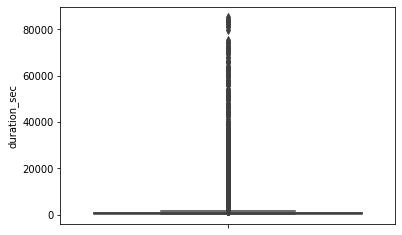

In [8]:
#Plotting duration_sec as box plot shows there some large outliers which skew the distribution.These are probably due to 
#people renting a bike and taking it home overnight for example so not representative of a normal trip. Might be worth 
#excluding these outliers from anay analysis on trip duration.
sb.boxplot(y="duration_sec", data=df);

In [24]:
#Large majority of trips taken by male riders
df.member_gender.value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

## Cleaning

In [4]:
#Create array variable of day of week order as this will be used in multiple plots
dow_order = ['Monday', 'Tuesday', 'Wednesday','Thursday','Friday','Saturday','Sunday']

In [5]:
#Convert start_time and end_time to a dateTime data type.
#Create new variable called ride_dow that will hold day of week that ride took place. Convert this to a categorical variable.
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])
df['ride_dow'] = df['start_time'].dt.day_name()
df['ride_dow'] = pd.Categorical(df['ride_dow'],
                                    categories=dow_order,
                                    ordered=True)

In [6]:
#Create new variable called ride_hod that will hold hour of day that ride took place.
df['ride_hod'] = df['start_time'].dt.hour

In [7]:
#Create new column called ride_duration_min which is calculated from duration_sec field as it makes more sense to talk about
#durations in minutes.
df['ride_duration_min'] = df['duration_sec']/60

In [8]:
#Filter out records without a value for start_station_id and end_station_id
df = df[df.start_station_id.notnull()]
df = df[df.end_station_id.notnull()]

In [9]:
#Convert station ids from Float to Int
df['start_station_id'] = df['start_station_id'].astype(int)
df['end_station_id'] = df['end_station_id'].astype(int)

In [10]:
#Convert the member_birth_year to int.
df = df[df.member_birth_year.notnull()]
df['member_birth_year'] = df['member_birth_year'].astype(int)

In [11]:
#Remove records with member_birth_year less than 1917
df = df.query("member_birth_year > 1917") 

In [12]:
#I want to do some analysis on the different trips i.e. origin/destination combo's so want to create a new column called orig_dest that shows the start and end stations names
df['orig_dest'] = df['start_station_name'] + ' to ' + df['end_station_name']

In [13]:
#Convert the orig_dest variable to a categorical variable
df['orig_dest'] = pd.Categorical(df['orig_dest'])

In [14]:
#Convert the orig_dest variable to a categorical variable
df['member_gender'] = pd.Categorical(df['member_gender'])

In [15]:
#Create new column called is_weekend to specify whether the ride occured during the weekend or during a weekday
df['is_weekend'] = np.where(df['ride_dow'].isin(['Saturday','Sunday']), 'weekend', 'weekday')
df['is_weekend'] = pd.Categorical(df['is_weekend'], ['weekday', 'weekend'])

In [16]:
#Create bins for member_birth_years
bins = np.arange(1920, 2020, 10)
bins

array([1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010])

In [17]:
#Create new dataframe column member_birth_year_bins
df['member_birth_year_bin']=pd.cut(df['member_birth_year']+1,bins, labels=['1920-1929', '1930-1939', '1940-1949', '1950-1959','1960-1969','1970-1979','1980-1989','1990-1999','2000-2010'])

In [18]:
#Use to test that records on boundary of bins are assigned to correct bin
df.query("member_birth_year == '2000' and member_birth_year_bin != '2000-2010'").head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,ride_dow,ride_hod,ride_duration_min,orig_dest,is_weekend,member_birth_year_bin


In [19]:
#Remove outliers for duration_min column
df=df.query('ride_duration_min<ride_duration_min.quantile(0.99)')

### What is the structure of your dataset?

> The dataset comes in the form of a csv file with 183412 entries each representing a single ford go bike trip. Each row in the dataset consists of 16 columns representing different pieces of information relating to the trip. I made the decision to remove records with null values for start_station_id and end_station_id and member_birth_year. I also removed records with a value for member_birth_year that was less than 1917 as I considered these to be unlikely as would make user over 100 years old. I also removed records that had a ride_duration_min above the 99th percentile to remove extreme outliers. After performing the above operations I was left with 173129 records from an original of 183412. I decided to remove all these records at the start so that all future analysis would be done against the same dataset.  


### What is/are the main feature(s) of interest in your dataset?

> The features I am interested in the dataset include age and gender of user, as it would be interesting to see how the use of the bike service varies across these variables. I am also interested in trip duration, trip start and end points, time of day and day of week of trip. This should allow me to perform analysis on how the bike service is used by the different genders and age groups and if the frequency of use changes through the days of the week, an hours of day. Also whether there is a difference in use of service between weekdays and weekends

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The information on trip duration, trip date and time, and start and end stations will allow for some interesting analysis based on the features mentioned above e.g. is average trip duration dependent on rider gender? Are more rides taken by subscribers vs customers? What is the proportion of subscribers to customers within the different age groups? 

> The columns member_gender, member_birth_year, duration_sec, start_station_name, end_station_name should allow me to explore the features I am interested in. I have extracted the hour of trip and day of trip from the start_time field to answer questions related to when trips are taken. One limitation I found is that the data set does not include a unique identifier for the user, so there is no way to perform any analysis on frequency of use for specific users. This would have been helpful as I could have answered questions like 'which age groups tend to ube repeat users of the bike service'. I initially thought that the duration_sec column might allow me to answer questions like 'do younger users take less time than older users for trips between the same stations. This feature may still be able to answer this question, but it needs to be considered that the duration_sec doesn't necessarily account only for riding time as the user may have the bike stationary for an extended period of time before docking it.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


> **Rubric Tip**: The project (Parts I alone) should have at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.



>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 


### Question 
Which days of the weeks see the highest use of the bike service?

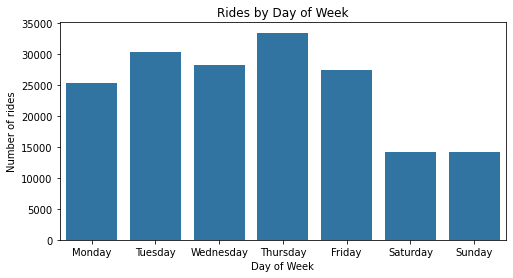

In [20]:
plt.figure(figsize=(8,4))
sb.countplot(data = df, x = 'ride_dow', order=dow_order,color=sb.color_palette()[0]);
plt.title('Rides by Day of Week');
plt.xlabel('Day of Week')
plt.ylabel('Number of rides');

### Observation
The above bar chart shows that the bike service does not see as much use during the weekends compared to weekdays with approximately 15000 rides on Saturday and the same on Sunday compared to upwards of 25000 rides for weekdays. Thursday seems to be the most popular day with around 32000 rides. Note, it should not be assumed that the month of February is representative of all the months in the year. Its feasible that the number of bike rides taken during the weekends might increase in the summer months. Will also be iterestig to see if this patter of use is the same across genders and age groups.

### Question
What hours of the day see the highest use of the bike service?

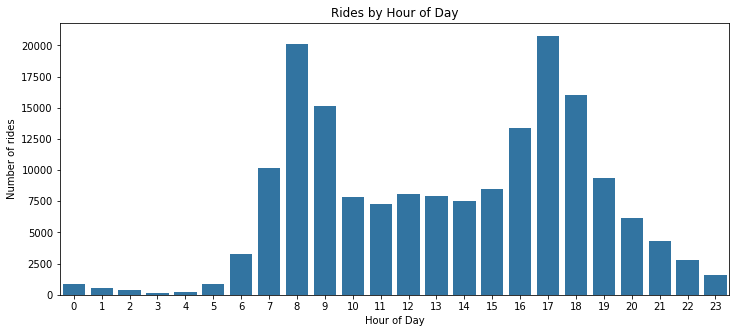

In [21]:
plt.figure(figsize=(12,5))
sb.countplot(data = df, x = 'ride_hod',color=sb.color_palette()[0]);
plt.title('Rides by Hour of Day');
plt.xlabel('Hour of Day')
plt.ylabel('Number of rides');

### Observation 
The above bar chart shows that the bike service sees the highest use between the hours of 8am to 9am and 5pm to 6pm. This makes sense as there are probably a lot of people using the bike service to commute to and from work. It will be interesting to see how these numbers change for weekday rides vs weekend rides.

### Question
Is the bike service used equally between the genders or is its use dominated by one or the other?

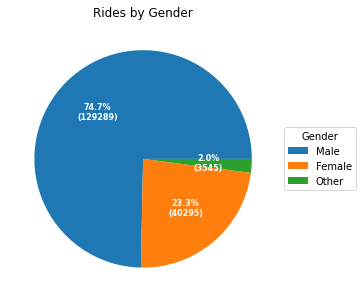

In [22]:
fig, ax = plt.subplots(figsize=(12, 5), subplot_kw=dict(aspect="equal"))

def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:d})".format(pct, absolute)

gender_counts = df['member_gender'].value_counts()

wedges, texts, autotexts = ax.pie(gender_counts, autopct=lambda pct: func(pct, gender_counts),
                                  textprops=dict(color="w"))

ax.legend( gender_counts.index,
          title="Gender",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("Rides by Gender")

plt.show()

### Observation 
The above pie chart shows that there are a lot more rides being taken by males than females. With 74.7% of rides being taken by males, to 23.3% for females and just 2.0% for users who identify as gender 'Other'.

### Question
How are the trips taken divided between the different user types i.e . Subscriber vs Customer. Subscribers are those who pay for a recurring subscription fee and customers are those who pay a one-off charge.

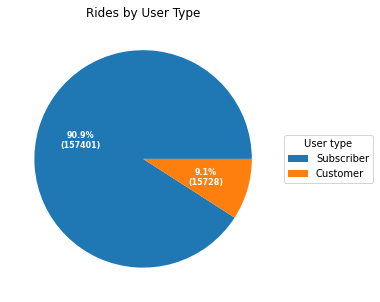

In [23]:
fig, ax = plt.subplots(figsize=(12, 5), subplot_kw=dict(aspect="equal"))

def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:d})".format(pct, absolute)

user_type_counts = df['user_type'].value_counts()

wedges, texts, autotexts = ax.pie(user_type_counts, autopct=lambda pct: func(pct, user_type_counts),
                                  textprops=dict(color="w"))

ax.legend( user_type_counts.index,
          title="User type",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("Rides by User Type")

plt.show()

### Observation
The above pie chart shows that the vast majority or rides are taken by subscribers of the bike service as opposed to customers. The split being 90.6% to 9.4%. Note this does not tell us anything about the number of individual subscribers using the bike service as the data does not allow us to determine individual users. So the numbers of subscribers vs customers could be closer than this chart suggests, but each subscriber taking multiple trips with each customer only taking one.

### Question 
How long does a typical ride last?

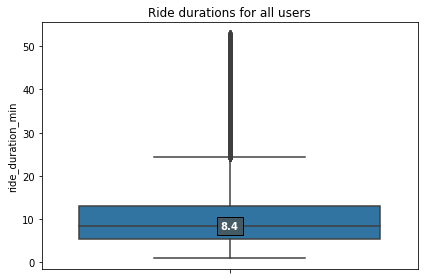

In [24]:
#data=df.query('ride_duration_min<ride_duration_min.quantile(0.95)')
box_plot = sb.boxplot(y="ride_duration_min", data=df)
plt.title('Ride durations for all users')

ax = box_plot.axes
lines = ax.get_lines()
categories = ax.get_xticks()

for cat in categories:
    # every 4th line at the interval of 6 is median line
    # 0 -> p25 1 -> p75 2 -> lower whisker 3 -> upper whisker 4 -> p50 5 -> upper extreme value
    y = round(lines[4+cat*6].get_ydata()[0],1) 

    ax.text(
        cat, 
        y, 
        f'{y}', 
        ha='center', 
        va='center', 
        fontweight='bold', 
        size=10,
        color='white',
        bbox=dict(facecolor='#445A64'))

box_plot.figure.tight_layout()

### Observation
Above box chart shows that the mean ride duration is 8.4 mins. Note: to avoid extreme outliers skewing the data I have only included records that fall within 99 percentile in terms of duration. Further analysis could be done to compare how the trip durations compare between the genders or different age groups. Also, one needs to be careful in making an assumptions based on this simple plot as it is not taking into account which stations the ride occured from and to or which time of day.

### Question 
Which trip route i.e. origin/destination combination sees the largest number of rides?

In [25]:
#Create dataframe of trips (origin/destination combos) ride counts
df_trip_counts = pd.DataFrame(df.orig_dest.value_counts().reset_index().values, columns=["orig_dest", "ride_counts"])

In [26]:
#Get top 10 rides 
top_10_trips = df_trip_counts.head(10)

In [34]:
top_10_trips

,orig_dest,ride_counts
0,Berry St at 4th St to San Francisco Ferry Buil...,326
1,Grand Ave at Perkins St to 19th Street BART St...,307
2,San Francisco Ferry Building (Harry Bridges Pl...,285
3,19th Street BART Station to Grand Ave at Perki...,282
4,The Embarcadero at Sansome St to Steuart St at...,281
5,Townsend St at 7th St to San Francisco Caltrai...,260
6,San Fernando St at 7th St to 5th St at Virgini...,249
7,Market St at 10th St to Montgomery St BART Sta...,243
8,5th St at Virginia St to San Fernando St at 7t...,242
9,Market St at 10th St to San Francisco Caltrain...,232


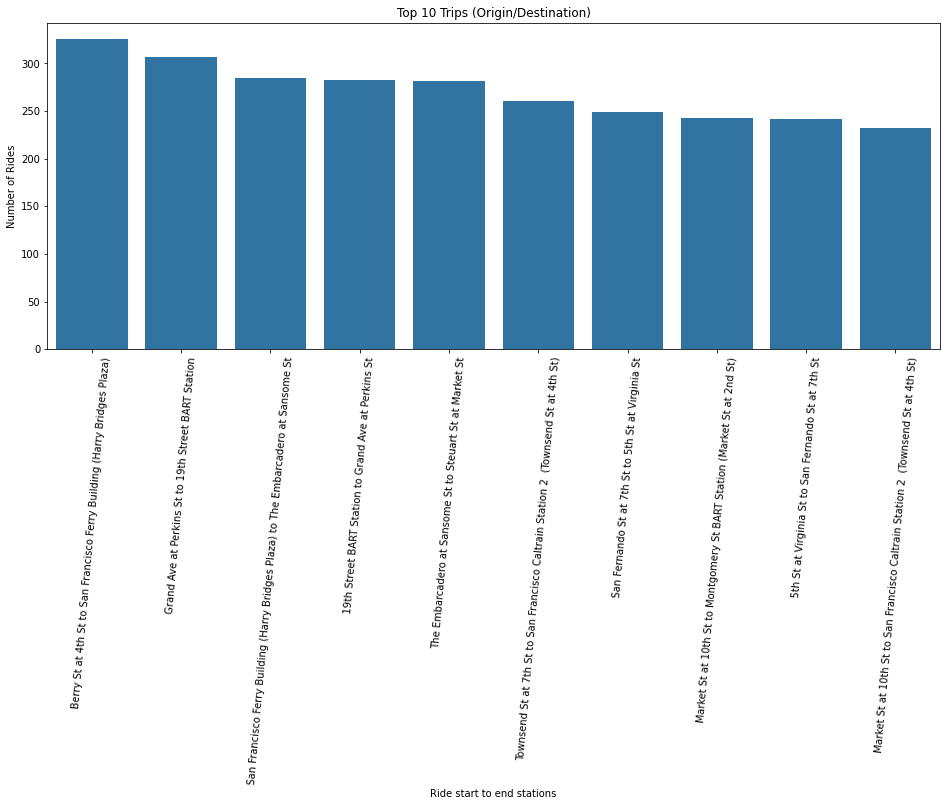

In [27]:
plt.figure(figsize=(16,6))
base_color = sb.color_palette()[0]
sb.barplot(data = top_10_trips, x = 'orig_dest', y='ride_counts',color=base_color);
plt.title('Top 10 Trips (Origin/Destination)');
plt.xlabel('Ride start to end stations')
plt.ylabel('Number of Rides')
plt.xticks(rotation=85);

### Observation
The above bar plot shows that the top 10 trips in terms of rides see quite similar numbers i.e between 230 and 330 rides taken in the month of February. The most frequented trip was 'Berry St at 4th St to San Francisco Ferry Building (Harry Bridges Plaza)'. It might be interesting to plot the same graph but seperate weekday rides from weekend rides.

### Question 
How are the ages of the users of the bike service distributed? Note: As we only have birth years of the users we can't determine the exact age, however birth years still gives us a general idea of the age groups.

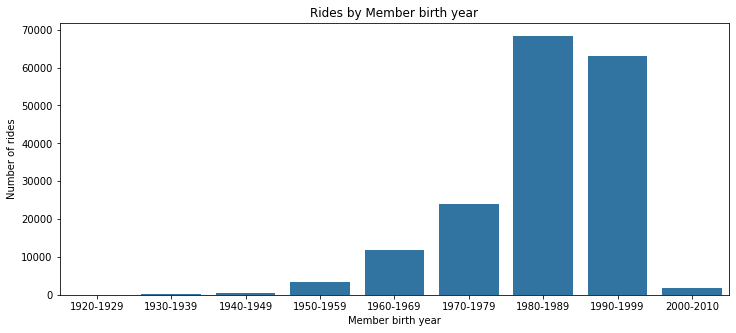

In [28]:
plt.figure(figsize=(12,5))
base_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'member_birth_year_bin',color=base_color);
plt.title('Rides by Member birth year');
plt.xlabel('Member birth year')
plt.ylabel('Number of rides');

In [29]:
df.query("member_birth_year_bin in ['1980-1989','1990-1999']").shape[0]/df.shape[0]

0.7587752485141137

### Observation
Above barplot shows that the bike service sees the most trips taken by users with birth years between 1980 and 1989 followed closely by users with birth years between 1990 and 1999. These 2 age groups account for 76% of rides taken. The barplot is left skewed with a high number of users in age brackets mentioned above and tails off with less and less users in earlier age brackets. Further analysis the birth_years are distributed similarly for the different genders or user types. 

### Initial Analysis

> The dataset does not include a field for user_id. This means that its not possible to perform any analysis in terms of individual users. We can't tell which genders or which age groups are more likely to be repeat users.

> Males account for around three quarters of all rides taken. However as mentioned above, we can't tell if this is because male users takes more trips than female users i.e. the proportion of Males to Female users may be a lot closer than 4:1 but males tend to use the service more.

> There are some large outliers for the trip duration fields. The max trip duration was 1409 minutes which is close to 24 hours. This is probably due to a user taking a bike home overnight before docking it at a station. I made the decision to remove these by only taking records that fell below 99th percentile for ride_duration_min.

> There appear to be some invalid values in the member_birth_year column. The mimimun birth year is 1878, which is either a mistake and meant to be 1978 or a user entering joke data. There are also 72 records with member_birth_year less than 1917 which in 2018 would make these users 100 years old or older, which seems pretty unlikely. So when performing any analysis on the member birth year it will make sense to remove these outlier records.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Created new column duration_min based on duration_sec as makes more sense to analyse ride durations in terms of minutes.

> Converted the start_time and end_time columns from type string to dateTime. Then created 2 new columns for ride hour of day (ride_hod) and ride day of week (ride_dow) as this will allow me to perform analysis on when rides are taken during the day and also during the week.

> Created a new column called is_weekend to distinguish whether the ride occured during the weekend or during the week as I think it could be interesting to see how the use of the bike service differs between weekdays and weekends.

> Created a new column called orig_dest by joining the start station and end station names as I am interested in finding out which routes are the busiest in terms of number of trips.

> I removed all records that did not contain a value in station_start_id and station_end_id. This took care of any records that did not have a value populated for member_birth_year and member_gender.

> I created a new column for member_birth_year_bin to divide the birth years up in to 10 year bins.

> I also removed records above the 99th percentile for duration_min as there were some large outliers for this column. This left me with 173129 records.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Question: 

How does the frequency of rides across hours of the day compare between weekdays and weekends? 

In [30]:
#Create seperate dataframes for weekday vs weekend rides
df_weekdays = df[df['is_weekend'].isin(['weekday'])]
df_weekends = df[df['is_weekend'].isin(['weekend'])]

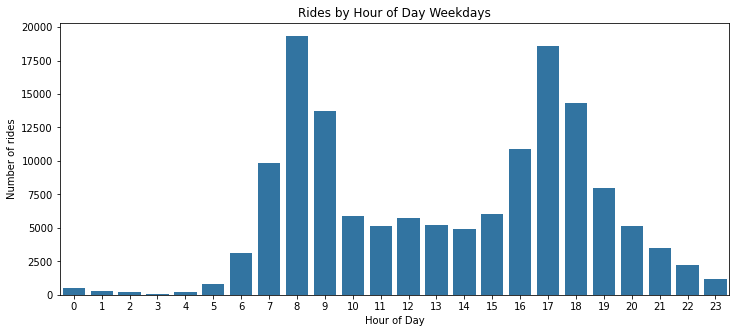

In [31]:
plt.figure(figsize=(12,5))
base_color = sb.color_palette()[0]
sb.countplot(data = df_weekdays, x = 'ride_hod',color=base_color);
plt.title('Rides by Hour of Day Weekdays');
plt.xlabel('Hour of Day')
plt.ylabel('Number of rides');

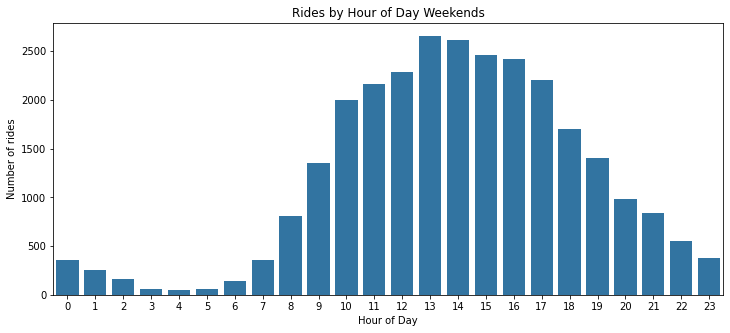

In [32]:
plt.figure(figsize=(12,5))
base_color = sb.color_palette()[0]
sb.countplot(data = df_weekends, x = 'ride_hod',color=base_color);
plt.title('Rides by Hour of Day Weekends');
plt.xlabel('Hour of Day')
plt.ylabel('Number of rides');

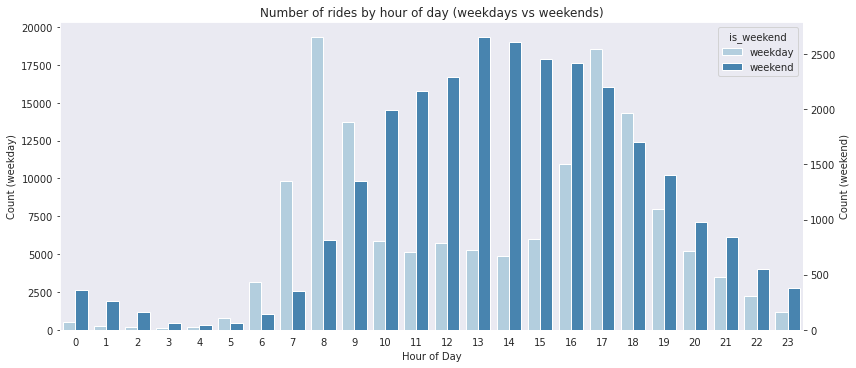

In [33]:
#Create countplot of number of rides by hour of day for both weekday and weekend rides.
sb.set_style('dark')
fig, ax1 = plt.subplots(figsize=(12, 5))
ax2 = ax1.twinx()
for ax, category in zip((ax1, ax2), df['is_weekend'].cat.categories):
    sb.countplot(data=df[df['is_weekend'] == category], x='ride_hod', hue='is_weekend', palette='Blues', ax=ax)
    ax.set_ylabel(f'Count ({category})')
ax1.legend_.remove()  # both axes got a legend, remove one
ax1.set_xlabel('Hour of Day')
plt.tight_layout()
plt.title('Number of rides by hour of day (weekdays vs weekends)')
plt.show()

In [34]:
#Create dataframe that represents count of rides by day of week / hour of day
df.groupby('ride_dow')['ride_hod'].value_counts().unstack().reindex(dow_order)

ride_hod,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
ride_dow,,,,,,,,,,,,,,,,,,,,,
Monday,94,43,38,19,39,130,587,1643,3181,2211,...,891,1158,1984,3283,2348,1412,917,601,371,179
Tuesday,77,52,32,17,31,175,681,2180,4226,3220,...,1055,1179,2179,3955,3138,1646,1095,664,350,176
Wednesday,82,45,27,14,25,158,561,1797,3570,2562,...,931,1081,2113,3798,3033,1776,1136,866,504,238
Thursday,120,44,28,18,42,181,700,2261,4458,2793,...,1120,1361,2583,4488,3600,1949,1363,867,530,305
Friday,141,77,61,29,41,151,607,1948,3905,2973,...,891,1243,2062,3032,2200,1167,664,515,472,274
Saturday,209,161,72,25,24,34,89,201,495,774,...,1295,1167,1078,1069,784,655,426,391,273,228
Sunday,151,97,87,34,22,29,51,152,317,578,...,1318,1292,1340,1136,918,748,554,448,276,149


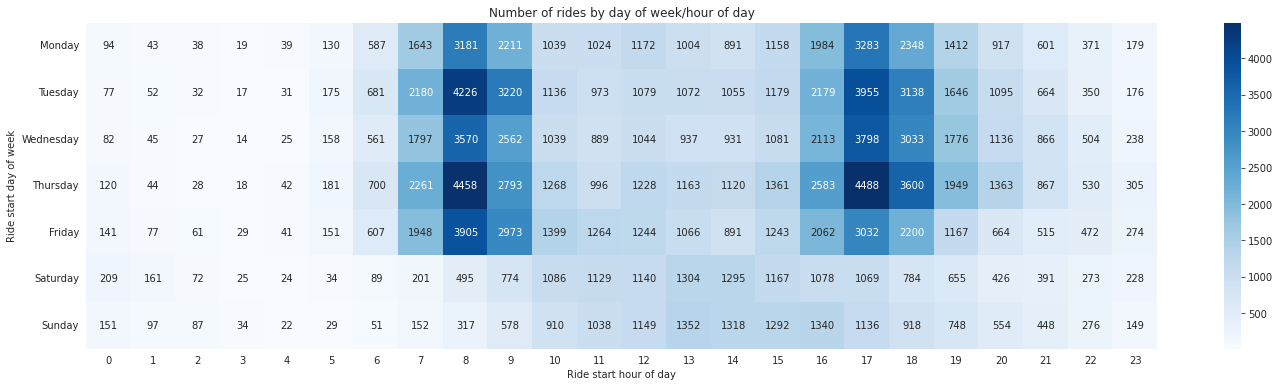

In [35]:
plt.figure(figsize=[24,6])
sb.heatmap(df.groupby('ride_dow')['ride_hod'].value_counts().unstack().reindex(dow_order),
           annot=True, fmt='0.0f',cmap='Blues')
plt.title('Number of rides by day of week/hour of day')
plt.xlabel('Ride start hour of day')
plt.ylabel('Ride start day of week');

### Observation
The countplot of 'Number of Rides by hour of day (Weekend vs Weekdays)' above illustrates clearly the differences in use of the bike service between weekdays and weekends. During weekdays the busiest hours are between 7am and 9am and 4pm and 6pm when people are using the bike service to commute to and from work. In contrast the distribution of rides by hour for the weekends shows the busiest time being the early afternoon, between 1pm and 3pm with the plot resembling a normal distribution with rides by hour falling away either side of this peak. The heatmap plotting rides across day of week / hour of day illustrates the same fact. It clearly shows that more rides are recorded during weekdays between the hours of 7am to 9am and 4pm to 6pm.

### Question 
Is there are a difference in the duration of trips between the different genders?

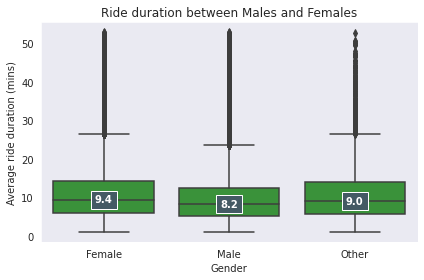

In [36]:
#data=df.query('duration_sec<duration_sec.quantile(0.95)')
base_color = sb.color_palette()[2]
box_plot = sb.boxplot(data=df, x='member_gender', y='ride_duration_min', color=base_color);
plt.title('Ride duration between Males and Females')
plt.xlabel('Gender')
plt.ylabel('Average ride duration (mins)')

ax = box_plot.axes
lines = ax.get_lines()
categories = ax.get_xticks()

for cat in categories:
    # every 4th line at the interval of 6 is median line
    # 0 -> p25 1 -> p75 2 -> lower whisker 3 -> upper whisker 4 -> p50 5 -> upper extreme value
    y = round(lines[4+cat*6].get_ydata()[0],1) 

    ax.text(
        cat, 
        y, 
        f'{y}', 
        ha='center', 
        va='center', 
        fontweight='bold', 
        size=10,
        color='white',
        bbox=dict(facecolor='#445A64'))

box_plot.figure.tight_layout()


### Observation
The above boxplot shows that there is no marked difference in terms of trip duration between the different genders. Males have a slightly lower mean trip duration of 8.2 minutes compared to 9.0 for Other and 9.4 for females. It is difficult to know if this is because overall Males are slightly quicker than females or they tend to take trips between stations that are not as far apart or have less foot or vehicle traffic.

### Question: 
Is there a difference in trip duration between weekdays and weekends?

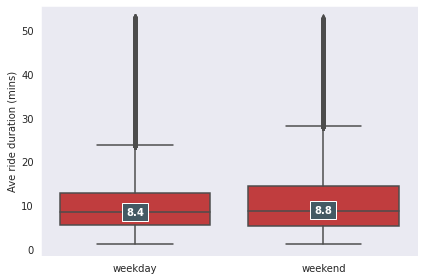

In [37]:
#data=df.query('duration_sec<duration_sec.quantile(0.95)')
base_color = sb.color_palette()[3]
box_plot = sb.boxplot(data=df, x='is_weekend', y='ride_duration_min', color=base_color);
plt.xlabel(None)
plt.ylabel('Ave ride duration (mins)')

ax = box_plot.axes
lines = ax.get_lines()
categories = ax.get_xticks()

for cat in categories:
    # every 4th line at the interval of 6 is median line
    # 0 -> p25 1 -> p75 2 -> lower whisker 3 -> upper whisker 4 -> p50 5 -> upper extreme value
    y = round(lines[4+cat*6].get_ydata()[0],1) 

    ax.text(
        cat, 
        y, 
        f'{y}', 
        ha='center', 
        va='center', 
        fontweight='bold', 
        size=10,
        color='white',
        bbox=dict(facecolor='#445A64'))

box_plot.figure.tight_layout()

### Observation:
Above boxplot shows that the mean trip durations between weekdays and weekends is very similar with 8.4mins for weekdays and 8.8 for weekends. I might have expected that perhaps weekends might have longer trip durations as people might be using the bikes for taking more leisurely journeys and perhaps stopping to take photos or stopping in a park, whereas people using the bike service in the weekdays might predominantly be people communting to and from work, so just want to get to their destination as soon as possible. However given that this data only includes trips taken during the month of February i.e. in winter when the temperature is fairly cold, perhaps the number of people using the bike service for leisurely trips is not as high. It would be interesting to see if there is any marked difference in mean trip duration between summer and winter months.

### Question: 
Do the different genders use the bike service at different times of day?

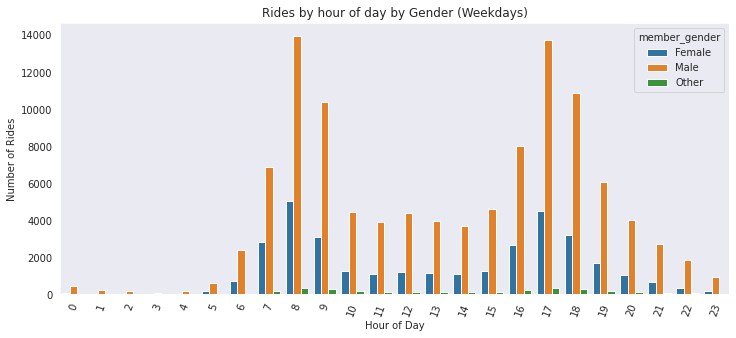

In [38]:
plt.figure(figsize=(12,5))
plt.xticks(rotation=70)
plt.title('Rides by hour of day by Gender (Weekdays)')
ax = sb.countplot(data = df_weekdays, x = 'ride_hod', hue = 'member_gender')
ax.set(xlabel="Hour of Day", ylabel = "Number of Rides");

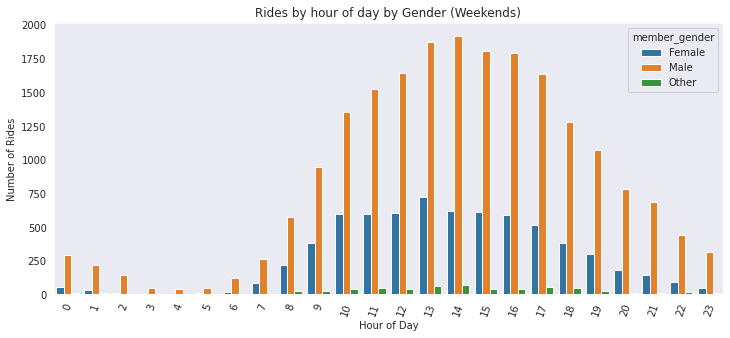

In [39]:
plt.figure(figsize=(12,5))
plt.xticks(rotation=70)
plt.title('Rides by hour of day by Gender (Weekends)')
ax = sb.countplot(data = df_weekends, x = 'ride_hod', hue = 'member_gender')
ax.set(xlabel="Hour of Day", ylabel = "Number of Rides");

### Observation: 
The above plots show that there is no marked difference in terms of when the different genders use the bike service. The shape of the countplots are very similar showing that the busiest hours of day for weekends and weekdays are the same as they are for Males and Females. Even though there are so few records for the gender group 'Other' the curve of the bars do seem to follow those for Males and Females. 

### Question:
How does the weekday vs weekend use of the bike service compare between members of different age groups?

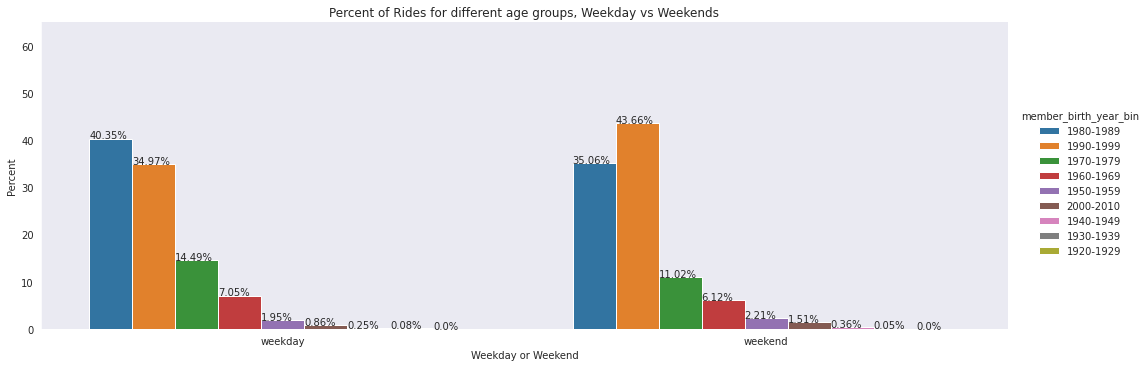

In [40]:
x,y = 'is_weekend', 'member_birth_year_bin'

df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sb.catplot(x=x,y='percent',hue=y,kind='bar',data=df1,aspect=20/7)
g.ax.set_ylim(0,65)
g.ax.set(xlabel ='Weekday or Weekend', ylabel = "Percent", title="Percent of Rides for different age groups, Weekday vs Weekends");

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

### Observation:
The above countplots show that younger rides tend to use the bike service more in the weekends than older riders. The percentage of all rides for users in birth year bracket 1990 to 1999 rose from 34.97% in the weekdays to 43.66%.

### Question 
Does the mean ride duration change for members of different birth years?

In [41]:
df_rd_mby = df.groupby(['member_birth_year'])['ride_duration_min'].mean()

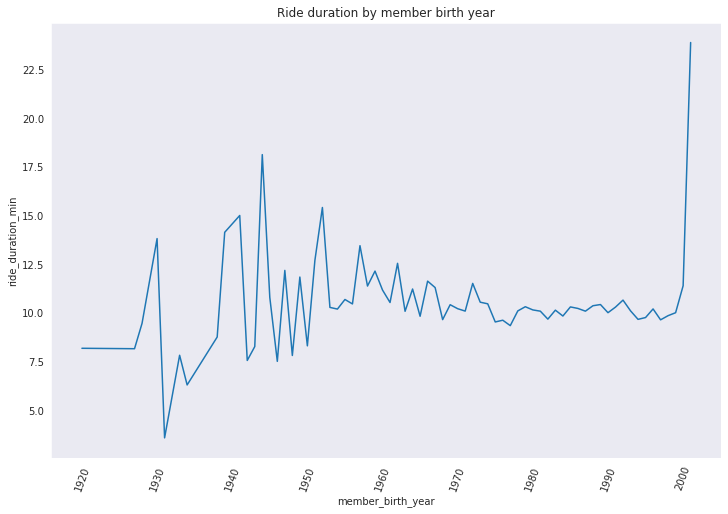

In [42]:
plt.figure(figsize=(12,8))
plt.xticks(rotation=70)
plt.title('Ride duration by member birth year')
sb.lineplot(data = df_rd_mby);

In [43]:
df_rd_mby = df_rd_mby.to_frame().reset_index()

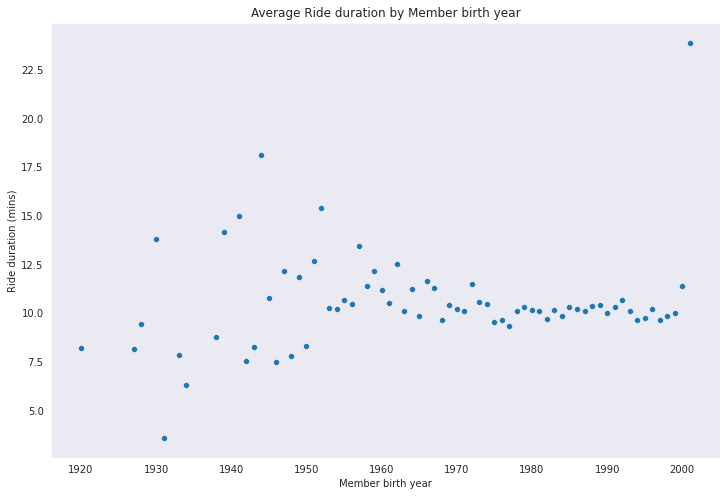

In [44]:
plt.figure(figsize=(12,8))
plt.title("Average Ride duration by Member birth year")
plt.xlabel("Member birth year")
plt.ylabel('Ride duration (mins)')
sb.scatterplot(data=df_rd_mby, x="member_birth_year", y="ride_duration_min");

### Observation:
The above line and scatterplots show that there is no obvious relationship between average ride duration across the different birth years.

### Question
Do the percentages of subscribers vs customers change depending on the age bracket?

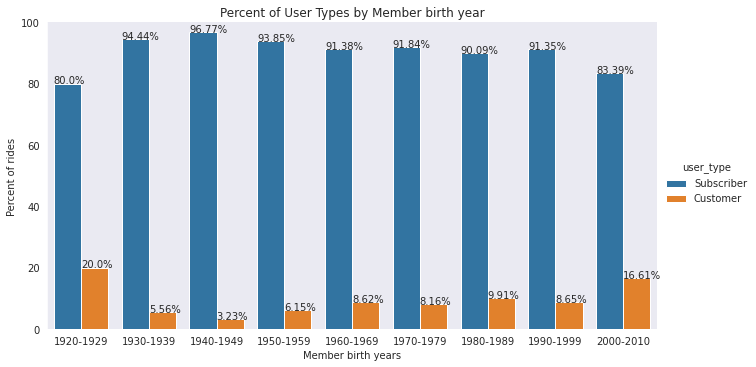

In [45]:
x,y = 'member_birth_year_bin', 'user_type'

df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sb.catplot(x=x,y='percent',hue=y,kind='bar',data=df1,aspect=15/8)
g.ax.set_ylim(0,100)
g.ax.set(xlabel = "Member birth years", ylabel = "Percent of rides", title="Percent of User Types by Member birth year");

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

In [53]:
df.query("member_birth_year > 2000").shape[0]

28

In [54]:
df.query("member_birth_year < 1929").shape[0]

5

### Observtion
The above plot shows that the percentages of customers to subscriber rides is fairly low across all the age brackets, however it does tend to increase for brackets of later years. The 2 age brackets 1920-1929 and 2000-2010 can probably be discared as there are only 5 and 28 records with these member_birth_year_bins.

### Question
How does the ratio of subscriber to customer rides compare across the different genders?

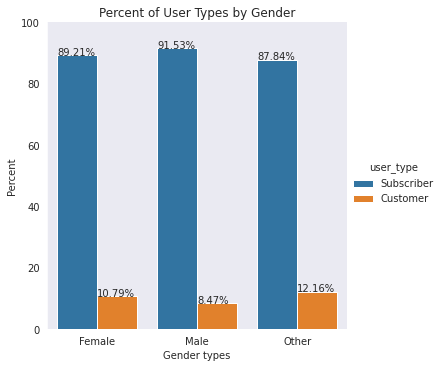

In [46]:
x,y = 'member_gender', 'user_type'

df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sb.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)
g.ax.set(xlabel="Gender types", ylabel = "Percent", title="Percent of User Types by Gender");

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

### Observation
The plot above shows that there are far more subscriber rides than customer rides across all genders. The percentage of customer rides is slightly higher for females than males, 10.79% vs 8.47%. Gender group other records the highest percentage of customer rides at 12.16%

### Question:
How does the ratio of subscriber to customer rides compare between weekdays and weekends?

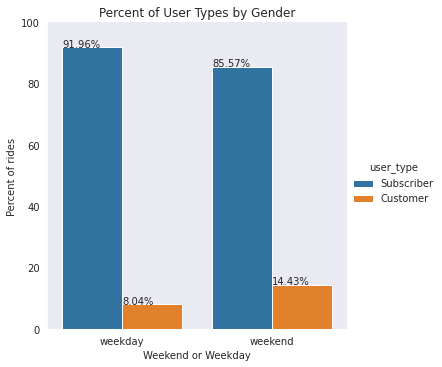

In [47]:
x,y = 'is_weekend', 'user_type'

df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sb.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)
g.ax.set(xlabel = "Weekend or Weekday", ylabel = "Percent of rides", title="Percent of User Types by Gender");

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

### Observation:
The above plot shows that there is a significant increase in the percentage of customer rides against subscriber rides in the weekends compare with weekdays. Subscriber rides still dominate with 85.57% tp 14.43% but during the weekdays the respective percentages are 91.96% to 8.04%. This increase could be due to the fact that a lot of subscribers would use the bike service to commute to and from work, whereas the weekends would see more out of town visitors just using the bike service on a one-off basis.

### Question
Does the ratio of Males to Females change depending on the age group?

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


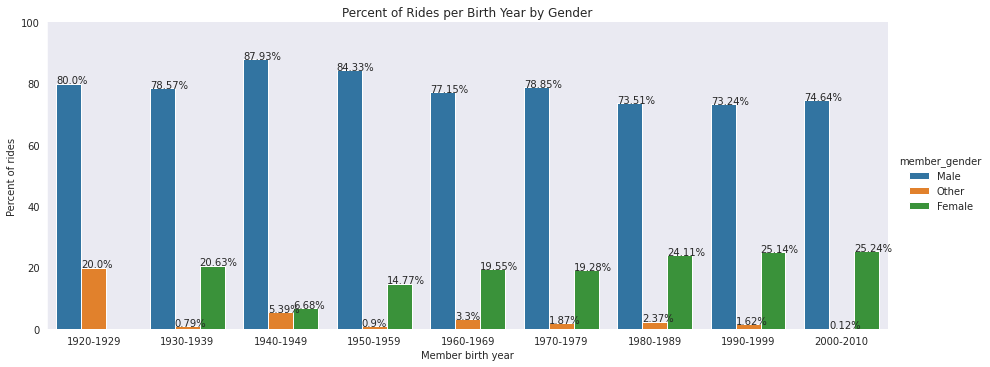

In [48]:
x,y = 'member_birth_year_bin', 'member_gender'

df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sb.catplot(x=x,y='percent',hue=y,kind='bar',data=df1,aspect=20/8)
g.ax.set_ylim(0,100)
g.ax.set(xlabel = "Member birth year", ylabel = "Percent of rides", title="Percent of Rides per Birth Year by Gender");

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

### Observation:
As expected Males strongly dominate the percentage of rides across all member birth year brackets. However the percentages for females increase considerably for later birth year brackets.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> *   There was a stark difference in terms of number of rides across the different hours of the day between rides taken during weekdays and those taken during the weekends. The busiest hours during the weekdays were early mornings 7am to 9am and 4pm to 6pm, while the busiest hours for weekend rides was mid afternoon between 1pm and 3pm. This would indicate that during the weekdays a lot of people use the bike service to commute to and from work. 
* The pattern of use across hours of the day and days of the week did not vary much between the different genders i.e. the busy hours of day/days of week for male users were the same as for female users.
*   When comparing the percentage of rides taken by the different age groups between weekdays and weekends, one can see that there is a percentage increase in users with birth years between 1985 and 1995 and those with birth years between 1995 and 2005, indicating that it people in their mid to late thirties and younger who are more likely to use the bike service during the weekends.
*  In terms of ride duration, Males recorded a considerably lower average ride duration of 7.8mins compared to 8.9mins for females and 8.5mins for gender group other. There was no great difference in ride duration between weekdays (8.1mins) and weekends (8.0mins). I'm really not sure if any sound conclusions can be drawn from these numbers as there are a number of other factors that would need to be considered when doing a comparison of ride durations i.e. as can be seen below the trips taken in the weekends vs the weekdays i.e. start and end station combinations differ quite a lot, so comparing only ride duration doesn't tell us much without taking into account which trips were taken. Time of day could also be a factor.
* A significant difference in the ratio of subscriber to customer rides was noted between weekdays and weekends. The subscriber rides dominated both sets, but the percentage of customer rides rose from 8.04% for weekdays to 14.43% for weekends. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

In [49]:
top_5_trips = df_trip_counts.head(5)

In [50]:
top_5_trips

,orig_dest,ride_counts
0,Berry St at 4th St to San Francisco Ferry Buil...,326
1,Grand Ave at Perkins St to 19th Street BART St...,307
2,San Francisco Ferry Building (Harry Bridges Pl...,285
3,19th Street BART Station to Grand Ave at Perki...,282
4,The Embarcadero at Sansome St to Steuart St at...,281


In [51]:
top_5_trip_names = top_5_trips['orig_dest']

In [52]:
top_5_trip_names

0    Berry St at 4th St to San Francisco Ferry Buil...
1    Grand Ave at Perkins St to 19th Street BART St...
2    San Francisco Ferry Building (Harry Bridges Pl...
3    19th Street BART Station to Grand Ave at Perki...
4    The Embarcadero at Sansome St to Steuart St at...
Name: orig_dest, dtype: object

In [53]:
df_only_trips_in_top_5_routes = df[df['orig_dest'].isin(top_5_trip_names)]
df_only_trips_in_top_5_routes = df_only_trips_in_top_5_routes[df_only_trips_in_top_5_routes['member_gender'].isin(['Male','Female'])]

In [54]:
df_only_trips_in_top_5_routes.shape[0]

1466

In [55]:
df_only_trips_in_top_5_routes.orig_dest.unique().shape[0]

5

In [111]:
df_only_trips_in_top_5_routes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1466 entries, 914 to 183225
Data columns (total 22 columns):
duration_sec               1466 non-null int64
start_time                 1466 non-null datetime64[ns]
end_time                   1466 non-null datetime64[ns]
start_station_id           1466 non-null int64
start_station_name         1466 non-null object
start_station_latitude     1466 non-null float64
start_station_longitude    1466 non-null float64
end_station_id             1466 non-null int64
end_station_name           1466 non-null object
end_station_latitude       1466 non-null float64
end_station_longitude      1466 non-null float64
bike_id                    1466 non-null int64
user_type                  1466 non-null object
member_birth_year          1466 non-null int64
member_gender              1466 non-null category
bike_share_for_all_trip    1466 non-null object
ride_dow                   1466 non-null category
ride_hod                   1466 non-null int64
ride_du

In [ ]:
plt.figure(figsize=(12,5))
ax = sb.boxplot(x="orig_dest", y="ride_duration_min", hue="member_gender",
                 data=df_only_trips_in_top_5_routes, palette="Set3")

In [ ]:
#data=df.query('duration_sec<duration_sec.quantile(0.95)')
base_color = sb.color_palette()[2]
box_plot = sb.boxplot(data=df_only_trips_in_top_5_routes, x='orig_dest', y='ride_duration_min', hue="member_gender", color=base_color);
plt.title('Ride duration between Males and Females')
plt.xlabel('Gender')
plt.ylabel('Average ride duration (mins)')

ax = box_plot.axes
lines = ax.get_lines()
categories = ax.get_xticks()

for cat in categories:
    # every 4th line at the interval of 6 is median line
    # 0 -> p25 1 -> p75 2 -> lower whisker 3 -> upper whisker 4 -> p50 5 -> upper extreme value
    y = round(lines[4+cat*6].get_ydata()[0],1) 

    ax.text(
        cat, 
        y, 
        f'{y}', 
        ha='center', 
        va='center', 
        fontweight='bold', 
        size=10,
        color='white',
        bbox=dict(facecolor='#445A64'))

box_plot.figure.tight_layout()

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Question
How do the most popular trips i.e origin to destination combinations compare between weekdays and weekends? Are these the same or do the weekends see more rides taken in different area's of San Francisco?

In [66]:
df_weekdays.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144874 entries, 4 to 183411
Data columns (total 22 columns):
duration_sec               144874 non-null int64
start_time                 144874 non-null datetime64[ns]
end_time                   144874 non-null datetime64[ns]
start_station_id           144874 non-null int64
start_station_name         144874 non-null object
start_station_latitude     144874 non-null float64
start_station_longitude    144874 non-null float64
end_station_id             144874 non-null int64
end_station_name           144874 non-null object
end_station_latitude       144874 non-null float64
end_station_longitude      144874 non-null float64
bike_id                    144874 non-null int64
user_type                  144874 non-null object
member_birth_year          144874 non-null int64
member_gender              144874 non-null category
bike_share_for_all_trip    144874 non-null object
ride_dow                   144874 non-null category
ride_hod            

In [58]:
weekday_ride_counts = pd.DataFrame(df_weekdays.orig_dest.value_counts().reset_index().values, columns=["orig_dest","ride_counts"])
weekend_ride_counts = pd.DataFrame(df_weekends.orig_dest.value_counts().reset_index().values, columns=["orig_dest", "ride_counts"])

In [59]:
#Get top 10 weekday rides
top_10_weekday_rides = weekday_ride_counts.head(10)

In [77]:
top_10_weekday_rides

,orig_dest,ride_counts
0,Berry St at 4th St to San Francisco Ferry Building (Harry Bridges Plaza),310
1,Grand Ave at Perkins St to 19th Street BART Station,286
2,The Embarcadero at Sansome St to Steuart St at Market St,270
3,19th Street BART Station to Grand Ave at Perkins St,262
4,Townsend St at 7th St to San Francisco Caltrain Station 2 (Townsend St at 4th St),243
5,San Francisco Ferry Building (Harry Bridges Plaza) to The Embarcadero at Sansome St,236
6,Market St at 10th St to Montgomery St BART Station (Market St at 2nd St),233
7,Market St at 10th St to San Francisco Caltrain Station 2 (Townsend St at 4th St),229
8,San Fernando St at 7th St to 5th St at Virginia St,223
9,Division St at Potrero Ave to San Francisco Caltrain Station 2 (Townsend St at 4th St),218


In [60]:
#Get top 10 weekend rides
top_10_weekend_rides = weekend_ride_counts.head(10)

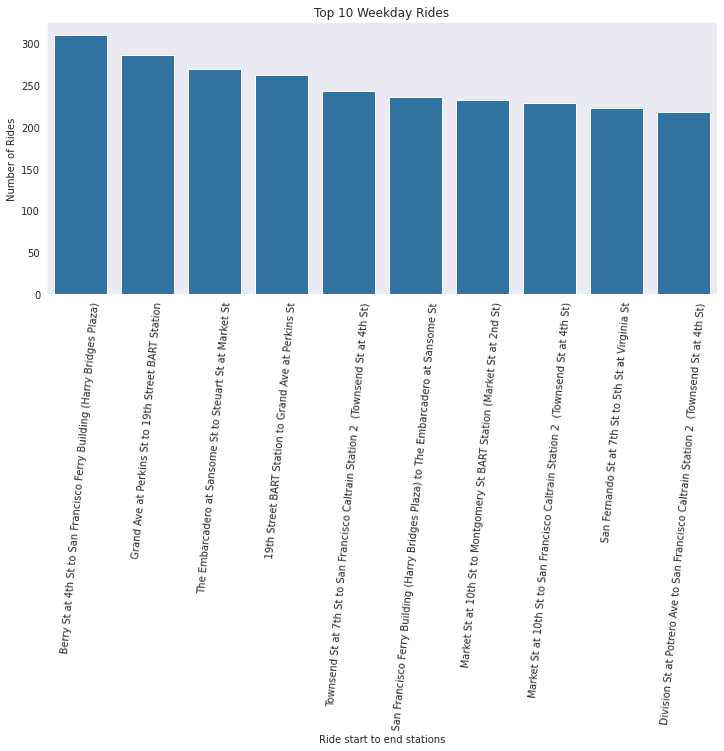

In [59]:
plt.figure(figsize=(12,5))
base_color = sb.color_palette()[0]
sb.barplot(data = top_10_weekday_rides, x = 'orig_dest', y='ride_counts',color=base_color);
plt.title('Top 10 Weekday Rides');
plt.xlabel('Ride start to end stations')
plt.ylabel('Number of Rides')
plt.xticks(rotation=85);

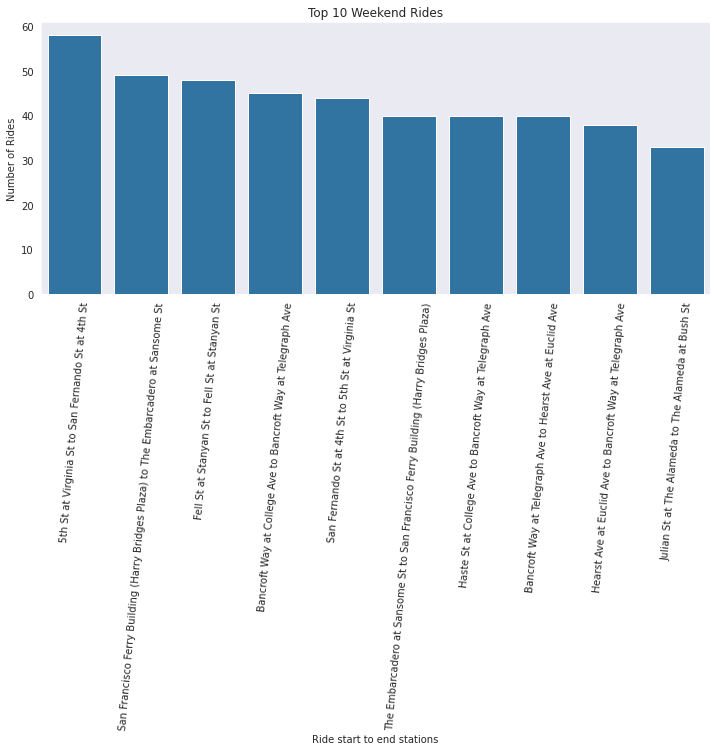

In [61]:
plt.figure(figsize=(12,5))
base_color = sb.color_palette()[0]
sb.barplot(data = top_10_weekend_rides, x = 'orig_dest', y='ride_counts',color=base_color);
plt.title('Top 10 Weekend Rides');
plt.xlabel('Ride start to end stations')
plt.ylabel('Number of Rides')
plt.xticks(rotation=85);

In [61]:
#Rides 2 and 4 are the same just in opposite directions. Same with rides 3 and 5 and rides 7 and 9 and ride 4 has the same station as start and end destination.
pd.set_option('display.max_colwidth',1000)
print(top_10_weekend_rides)

                                                                             orig_dest  \
0                                   5th St at Virginia St to San Fernando St at 4th St   
1  San Francisco Ferry Building (Harry Bridges Plaza) to The Embarcadero at Sansome St   
2                                       Fell St at Stanyan St to Fell St at Stanyan St   
3                         Bancroft Way at College Ave to Bancroft Way at Telegraph Ave   
4                                   San Fernando St at 4th St to 5th St at Virginia St   
5  The Embarcadero at Sansome St to San Francisco Ferry Building (Harry Bridges Plaza)   
6                             Haste St at College Ave to Bancroft Way at Telegraph Ave   
7                            Bancroft Way at Telegraph Ave to Hearst Ave at Euclid Ave   
8                            Hearst Ave at Euclid Ave to Bancroft Way at Telegraph Ave   
9                                   Julian St at The Alameda to The Alameda at Bush St   

  ride_co

In [92]:
#Use merge command to see if there are any routes that are in both top 10 weekday and weekend routes
common = top_10_weekday_rides.merge(top_10_weekend_rides, on=['orig_dest'])
common

,orig_dest,ride_counts_x,ride_counts_y
0,San Francisco Ferry Building (Harry Bridges Pl...,236,49


In [93]:
#I already have the top 10 weekday rides and top 10 weekend rides, so all I need to do is for each of these get the start and end
#long and lattiude from each df_weekends and df_weekdays dataframe
top_10_weekend_rides

,orig_dest,ride_counts
0,5th St at Virginia St to San Fernando St at 4t...,58
1,San Francisco Ferry Building (Harry Bridges Pl...,49
2,Fell St at Stanyan St to Fell St at Stanyan St,48
3,Bancroft Way at College Ave to Bancroft Way at...,45
4,San Fernando St at 4th St to 5th St at Virgini...,44
5,The Embarcadero at Sansome St to San Francisco...,40
6,Haste St at College Ave to Bancroft Way at Tel...,40
7,Bancroft Way at Telegraph Ave to Hearst Ave at...,40
8,Hearst Ave at Euclid Ave to Bancroft Way at Te...,38
9,Julian St at The Alameda to The Alameda at Bus...,33


In [63]:
#Get list of orig_dest values for weekday rides
top_10_weekday_rides_names = top_10_weekday_rides['orig_dest']

In [94]:
#Get list of orig_dest values for weekday rides
top_10_weekend_rides_names = top_10_weekend_rides['orig_dest']

In [95]:
type(top_10_weekday_rides_names)

pandas.core.series.Series

In [96]:
#Create dataframe of that contains top 10 wknd trips including longitude and latitude data, drop duplicates based on orig_dest
top_10_wknd_trips = df_weekends[df_weekends['orig_dest'].isin(top_10_weekend_rides_names)]
top_10_wknd_trips = top_10_wknd_trips.drop_duplicates(subset=['orig_dest'])

In [97]:
#Create dataframe of that contains top 10 wknd trips including longitude and latitude data, drop duplicates based on orig_dest
top_10_wkday_trips = df_weekdays[df_weekdays['orig_dest'].isin(top_10_weekday_rides_names)]
top_10_wkday_trips = top_10_wkday_trips.drop_duplicates(subset=['orig_dest'])

In [106]:
top_10_wkday_trips.shape[0]

10

In [99]:
top_10_wkday_trips['orig_dest']

114     Market St at 10th St to Montgomery St BART Sta...
598     San Fernando St at 7th St to 5th St at Virgini...
914     Berry St at 4th St to San Francisco Ferry Buil...
1342    19th Street BART Station to Grand Ave at Perki...
1357    Division St at Potrero Ave to San Francisco Ca...
1401    Market St at 10th St to San Francisco Caltrain...
1426    San Francisco Ferry Building (Harry Bridges Pl...
1763    The Embarcadero at Sansome St to Steuart St at...
2035    Townsend St at 7th St to San Francisco Caltrai...
6236    Grand Ave at Perkins St to 19th Street BART St...
Name: orig_dest, dtype: category
Categories (23297, object): [10th Ave at E 15th St to 10th Ave at E 15th St, 10th Ave at E 15th St to 10th St at Fallon St, 10th Ave at E 15th St to 13th St at Franklin St, 10th Ave at E 15th St to 21st Ave at Internati..., ..., Yerba Buena Center for the Arts (Howard St at ..., Yerba Buena Center for the Arts (Howard St at ..., Yerba Buena Center for the Arts (Howard St at ..., Yerba

In [107]:
#Combine the 2 dataframes of top 10 weekday vs top 10 weekday trips
comb_top_trips = top_10_wkday_trips.append(top_10_wknd_trips)

In [109]:
comb_top_trips.shape[0]

20

In [103]:
#Get center longitude and latitude to use in folium map
centroid_lat = comb_top_trips['start_station_latitude'].mean()
centroid_lon = comb_top_trips['start_station_longitude'].mean()

x = .1

n = 10

print(centroid_lat)
print(centroid_lon)

37.71352410921979
-122.25987769203621


In [104]:
#Use folium library to plot a map of trips
m2 = fm.Map([centroid_lat, centroid_lon], zoom_start=11)

for _, row in comb_top_trips.iterrows():
    if(row['is_weekend'] == 'weekend'):
        displ_start_lat = row['start_station_latitude']+0.0001
        displ_start_lon = row['start_station_longitude']+0.0001
        displ_end_lat = row['end_station_latitude']-0.0001
        displ_end_lon = row['end_station_longitude']-0.0001
        fm.CircleMarker([displ_start_lat, displ_start_lon],
                          radius=15,
                          fill_color="green", # divvy color
                        ).add_to(m2)
        fm.CircleMarker([displ_end_lat, displ_end_lon],
                          radius=15,
                          fill_color="green", # divvy color
                        ).add_to(m2)
        fm.PolyLine([[displ_start_lat, displ_start_lon], 
                      [displ_end_lat, displ_end_lon]],color="green").add_to(m2)
    else:
        fm.CircleMarker([row['start_station_latitude'], row['start_station_longitude']],
                          radius=15,
                          fill_color="blue", # divvy color
                        ).add_to(m2)
        fm.CircleMarker([row['end_station_latitude'], row['end_station_longitude']],
                          radius=15,
                          fill_color="blue", # divvy color
                        ).add_to(m2)
        fm.PolyLine([[row['start_station_latitude'], row['start_station_longitude']], 
                      [row['end_station_latitude'], row['end_station_longitude']]],color="blue").add_to(m2)

m2

This was a weekday trip
This was a weekday trip
This was a weekday trip
This was a weekday trip
This was a weekday trip
This was a weekday trip
This was a weekday trip
This was a weekday trip
This was a weekday trip
This was a weekday trip
This was a weekend trip
This was a weekend trip
This was a weekend trip
This was a weekend trip
This was a weekend trip
This was a weekend trip
This was a weekend trip
This was a weekend trip
This was a weekend trip
This was a weekend trip


### Observation:
The above analysis shows that there is quite a marked difference in where the bike service is used during the weekends compared to during weekdays. Only one route 'San Francisco Ferry Building (Harry Bridges Plaza) to The Embarcadero at Sansome St' appeared in both lists. This was 6th most frequented route during weekdays and 3rd most frequented route during weekdays. This is to be expected as the analysis on hours of days showed that the bike service was used a lot for commuting to work. It's likely that the business districts could be in different area's than parks and places that people want to visit on the weekends. The trips plotted against the map of San Francisco using the folium library give a good representation of where in the city these trips are made.

### Question
Does the ride duration change depending on day of week / hour of day

Text(0.5, 1.0, 'Mean trip duration by day of week/hour of day')

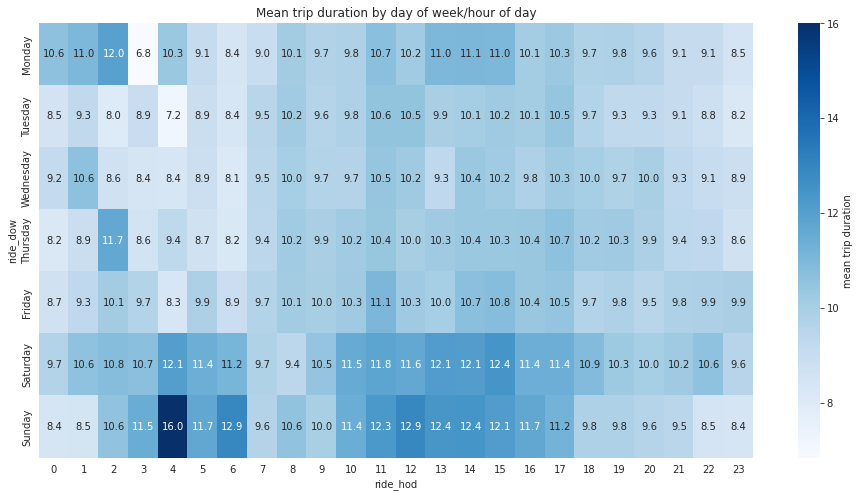

In [90]:
pivot = df.pivot_table(values='ride_duration_min', index='ride_dow', columns='ride_hod')
plt.figure(figsize=(16,8))
sb.heatmap(pivot, annot=True, fmt='.1f', cbar_kws = {'label': 'mean trip duration'}, cmap='Blues')
plt.title("Mean trip duration by day of week/hour of day")

### Observation
The above heatmap shows that there are not any combinations of day of week/hour of day where the average ride duration is significantly different from the mean. Although the boxes for Saturdays and Sundays between 8am and 5pm show a consistent darker shading than the majority of the plot, indicating greater ride duration during these hours, although only by a few minutes. This could be because people are taking more leisurely bike rides during the weekends rather than commuting to and from work. Interestingly the hours 3am to 6am shows some slightly higher than average trip durations. This could be down to people using the bike service on a drunken escapade after a night out, so taking slightly longer than usual, or biking for longer distances than normal due to there being no public transport available.

### Question 
Does the average ride duration between Males and Females change depending on the day of the week?

In [50]:
df_mf = df[df['member_gender'].isin(['Male','Female'])]
df_mf = df_mf.query('ride_duration_min<ride_duration_min.quantile(0.95)')

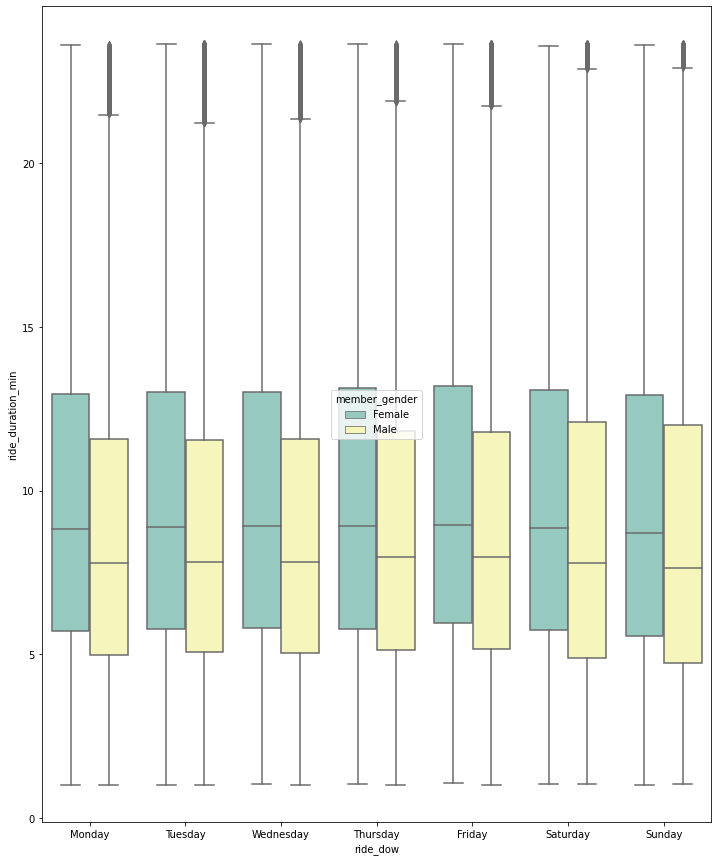

In [51]:
plt.figure(figsize=(12,15))
ax = sb.boxplot(x="ride_dow", y="ride_duration_min", hue="member_gender",
                 data=df_mf, palette="Set3",order=dow_order)

### Observation
As the above clustered box charts show the of average ride durations between Male and Females is pretty consistent across each day of the week. Males have consistently lower average trip durations across each day of the week.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

## Conclusions
>You can write a summary of the main findings and reflect on the steps taken during the data exploration.



> Remove all Tips mentioned above, before you convert this notebook to PDF/HTML


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

